In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping

# Load and preprocess the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Reshape the data to include the channel dimension and normalize the pixel values
x_train = x_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0
x_test = x_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0

# Build the LeNet-5 model with Dropout and BatchNormalization for regularization
lenet_model = Sequential([
    # First convolutional layer with 6 filters of size 5x5 and ReLU activation
    Conv2D(6, kernel_size=(5, 5), activation='relu', input_shape=(28, 28, 1)),
    # Batch normalization to normalize the activations
    BatchNormalization(),
    # Max pooling layer to downsample the feature maps
    MaxPooling2D(pool_size=(2, 2)),
    # Dropout layer to prevent overfitting
    Dropout(0.25),

    # Second convolutional layer with 16 filters of size 5x5 and ReLU activation
    Conv2D(16, kernel_size=(5, 5), activation='relu'),
    # Batch normalization to normalize the activations
    BatchNormalization(),
    # Max pooling layer to downsample the feature maps
    MaxPooling2D(pool_size=(2, 2)),
    # Dropout layer to prevent overfitting
    Dropout(0.25),

    # Flatten the feature maps to a 1D vector
    Flatten(),

    # Fully connected layer with 120 units and ReLU activation
    Dense(120, activation='relu'),
    # Batch normalization to normalize the activations
    BatchNormalization(),
    # Dropout layer to prevent overfitting
    Dropout(0.5),

    # Fully connected layer with 84 units and ReLU activation
    Dense(84, activation='relu'),
    # Batch normalization to normalize the activations
    BatchNormalization(),
    # Dropout layer to prevent overfitting
    Dropout(0.5),

    # Output layer with 10 units (one for each class) and softmax activation
    Dense(10, activation='softmax')
])

# Compile the model with Adam optimizer, lower learning rate, sparse categorical cross-entropy loss, and accuracy metric
lenet_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                    loss='sparse_categorical_crossentropy',
                    metrics=['accuracy'])

# Introduce early stopping to prevent overfitting and save the best model
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping
lenet_model.fit(x_train, y_train, epochs=50, batch_size=32, validation_data=(x_test, y_test), callbacks=[early_stopping])

# Save the trained model to a file

lenet_model.save('lenet_model.h5')



Epoch 1/50
1875/1875 [==============================] - 47s 24ms/step - loss: 0.5922 - accuracy: 0.8174 - val_loss: 0.1026 - val_accuracy: 0.9669
Epoch 2/50
1875/1875 [==============================] - 44s 24ms/step - loss: 0.2276 - accuracy: 0.9334 - val_loss: 0.0638 - val_accuracy: 0.9794
Epoch 3/50
1875/1875 [==============================] - 44s 23ms/step - loss: 0.1695 - accuracy: 0.9506 - val_loss: 0.0576 - val_accuracy: 0.9816
Epoch 4/50
1875/1875 [==============================] - 53s 28ms/step - loss: 0.1521 - accuracy: 0.9556 - val_loss: 0.0467 - val_accuracy: 0.9841
Epoch 5/50
1875/1875 [==============================] - 45s 24ms/step - loss: 0.1356 - accuracy: 0.9603 - val_loss: 0.0367 - val_accuracy: 0.9879
Epoch 6/50
1875/1875 [==============================] - 43s 23ms/step - loss: 0.1248 - accuracy: 0.9643 - val_loss: 0.0328 - val_accuracy: 0.9898
Epoch 7/50
1875/1875 [==============================] - 48s 25ms/step - loss: 0.1190 - accuracy: 0.9664 - val_loss: 0.0385 -

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping

# Load and preprocess the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

# Build the MLP model with Dropout and BatchNormalization for regularization
mlp_model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# Compile the model with a lower learning rate for better convergence
mlp_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

# Introduce early stopping to prevent overfitting and save the best model
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping
mlp_model.fit(x_train, y_train, epochs=50, batch_size=32, validation_data=(x_test, y_test), callbacks=[early_stopping])

# Save the model
mlp_model.save('mlp_model.h5')


Epoch 1/50
1875/1875 [==============================] - 20s 10ms/step - loss: 0.4664 - accuracy: 0.8560 - val_loss: 0.1537 - val_accuracy: 0.9523
Epoch 2/50
1875/1875 [==============================] - 18s 10ms/step - loss: 0.2758 - accuracy: 0.9162 - val_loss: 0.1236 - val_accuracy: 0.9619
Epoch 3/50
1875/1875 [==============================] - 16s 8ms/step - loss: 0.2303 - accuracy: 0.9321 - val_loss: 0.1052 - val_accuracy: 0.9688
Epoch 4/50
1875/1875 [==============================] - 16s 8ms/step - loss: 0.2051 - accuracy: 0.9385 - val_loss: 0.0919 - val_accuracy: 0.9713
Epoch 5/50
1875/1875 [==============================] - 15s 8ms/step - loss: 0.1864 - accuracy: 0.9435 - val_loss: 0.0928 - val_accuracy: 0.9701
Epoch 6/50
1875/1875 [==============================] - 15s 8ms/step - loss: 0.1733 - accuracy: 0.9474 - val_loss: 0.0844 - val_accuracy: 0.9734
Epoch 7/50
1875/1875 [==============================] - 15s 8ms/step - loss: 0.1622 - accuracy: 0.9518 - val_loss: 0.0740 - val_

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping

# Load and preprocess the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0
x_test = x_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0

# Data augmentation to improve generalization
datagen = ImageDataGenerator(rotation_range=10, width_shift_range=0.1, height_shift_range=0.1, zoom_range=0.1)

# Build the CNN model with dropout and batch normalization
cnn_model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# Compile the model with a lower learning rate and early stopping
cnn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

# Introduce early stopping to prevent overfitting and save the best model
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model with data augmentation and early stopping
cnn_model.fit(datagen.flow(x_train, y_train, batch_size=32), epochs=20,
              validation_data=(x_test, y_test), callbacks=[early_stopping])

# Save the model
cnn_model.save('cnn_model.h5')


11490434/11490434 [==============================] - 0s 0us/step
Epoch 1/20
1875/1875 [==============================] - 86s 45ms/step - loss: 0.3207 - accuracy: 0.8982 - val_loss: 0.0419 - val_accuracy: 0.9864
Epoch 2/20
1875/1875 [==============================] - 80s 43ms/step - loss: 0.1290 - accuracy: 0.9611 - val_loss: 0.0319 - val_accuracy: 0.9895
Epoch 3/20
1875/1875 [==============================] - 80s 43ms/step - loss: 0.0967 - accuracy: 0.9707 - val_loss: 0.0234 - val_accuracy: 0.9916
Epoch 4/20
1875/1875 [==============================] - 79s 42ms/step - loss: 0.0825 - accuracy: 0.9752 - val_loss: 0.0224 - val_accuracy: 0.9930
Epoch 5/20
1875/1875 [==============================] - 80s 43ms/step - loss: 0.0698 - accuracy: 0.9792 - val_loss: 0.0246 - val_accuracy: 0.9926
Epoch 6/20
1875/1875 [==============================] - 81s 43ms/step - loss: 0.0651 - accuracy: 0.9800 - val_loss: 0.0231 - val_accuracy: 0.9929
Epoch 7/20
1875/1875 [==============================] - 83s

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Saving 11.png to 11.png
1/1 [==============================] - 0s 80ms/step


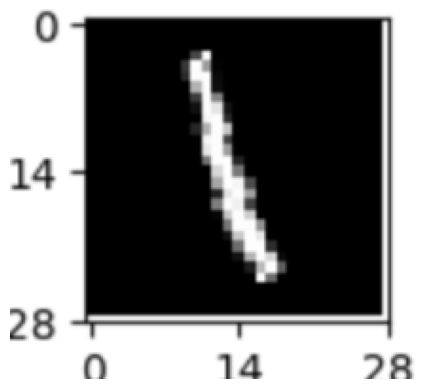

MLP prediction: 3  Probability: 0.9995944
LeNet-5 prediction: 1  Probability: 0.98626524
CNN prediction: 1  Probability: 0.9993092


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import load_model
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
from PIL import Image
import io

# Load the saved models
mlp_model = load_model('mlp_model.h5')
lenet_model = load_model('lenet_model.h5')
cnn_model = load_model('cnn_model.h5')

# Define function to preprocess image
def preprocess_image(img):
    img = img.convert('L')  # Convert to grayscale
    img = img.resize((28, 28))  # Resize to MNIST standard size
    img_array = np.array(img)  # Convert image to numpy array
    img_array = img_array.reshape(1, 28, 28, 1)  # Reshape for model input
    img_array = img_array.astype('float32') / 255.0  # Normalize pixel values
    return img_array

# ... (rest of the code)

def predict_digit():
    uploaded = files.upload()  # Upload image file
    for fn in uploaded.keys():
        # Read uploaded image file
        img = Image.open(io.BytesIO(uploaded[fn]))

        # Preprocess the image
        processed_img = preprocess_image(img)

        # Predict using models and get probabilities
        mlp_probs = mlp_model.predict(processed_img)[0]
        lenet_probs = lenet_model.predict(processed_img)[0]
        cnn_probs = cnn_model.predict(processed_img)[0]

        # Get predicted classes
        mlp_prediction = np.argmax(mlp_probs)
        lenet_prediction = np.argmax(lenet_probs)
        cnn_prediction = np.argmax(cnn_probs)

        # Display the uploaded image
        plt.imshow(img, cmap='gray')
        plt.axis('off')
        plt.show()

        # Print predictions and probabilities
        print("MLP prediction:", mlp_prediction, " Probability:", mlp_probs[mlp_prediction])
        print("LeNet-5 prediction:", lenet_prediction, " Probability:", lenet_probs[lenet_prediction])
        print("CNN prediction:", cnn_prediction, " Probability:", cnn_probs[cnn_prediction])
predict_digit()